# PART III - Machine Learning
#####  @ Haim Goldfisher

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import datatime (for dates)
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split #(divide into train/test)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# DATASET Num 1 : CLASSIFICATION

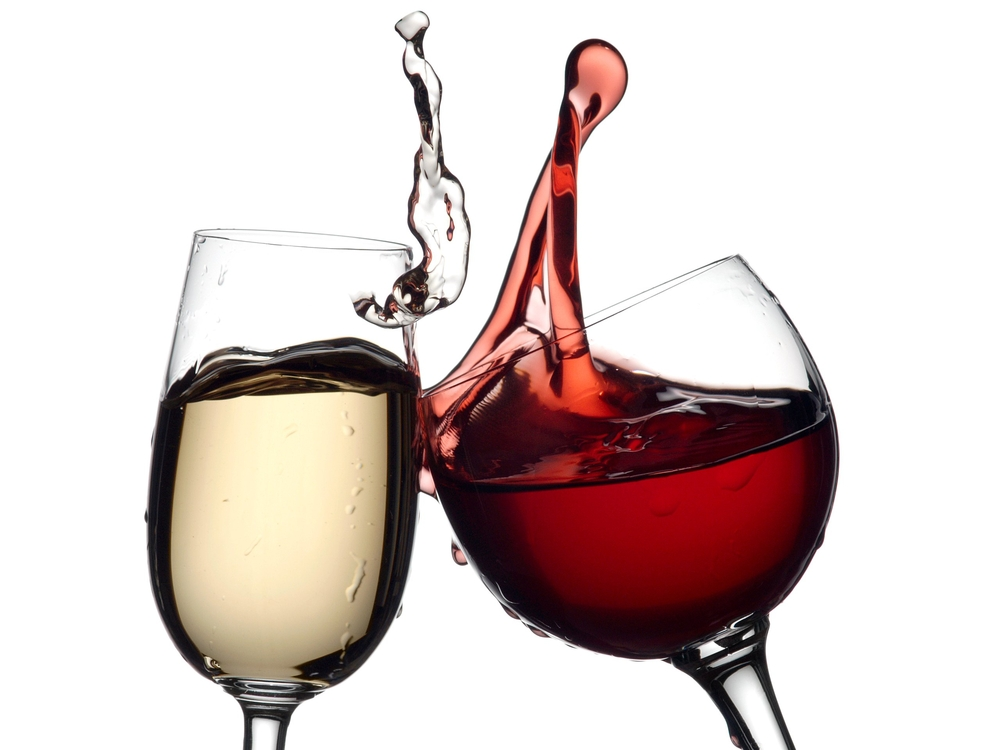

##### Quick review:
I Chose wine as my dataset. I would like to create a model which will predict the type of the wine(red/white), according to it's features.
At first, I thought that this model might be a little stupid. We have eyes, we also have mouth. There is no problem to recognize the difference between white and red wine. However, a model has no senses. It can't taste the wine or see it color. The idea that we can use only data to predict at first the color of the wine, and after it to connect person to specific wine, is a big thing. This model may looks a little boring to you, but to me it is the first step of a long journey.

The things that we are going to find out:
- Is there a connection between "" and the type of the wine?
- If I choose to use this model, can I predict....?

Firstly, we will upload the dataset:

In [102]:
wine = pd.read_csv('C:\Haim\Anaconda\wine.csv')

wine # display the first and last 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


Explantion for the features:
- **fixed acidity:** most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
- **volatile acidity:** the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
- **citric acid:** found in small quantities, citric acid can add 'freshness' and flavor to wines.
- **residual sugar:** the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- **chlorides:** the amount of salt in the wine.
- **free sulfur dioxide:** the free form of $SO_2$ exists in equilibrium between molecular $SO_2$ (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
- **total sulfur dioxide:** amount of free and bound forms of $SO_2$; in low concentrations, $SO_2$ is mostly undetectable in wine, but at free $SO_2$ concentrations over 50 ppm, $SO_2$ becomes evident in the nose and taste of wine.
- **density:** the density of water is close to that of water depending on the percent alcohol and sugar content.
- **pH:** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
- **sulphates:** a wine additive which can contribute to sulfur dioxide gas $(SO_2)$ levels, wich acts as an antimicrobial and antioxidant.
- **alcohol:** the percent alcohol content of the wine.
- **quality:** score between 0 and 10.
- **type:** red/white.


In [103]:
wine.info() # we would like to see if we have null values in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [104]:
wine.shape

(6497, 13)

In [105]:
wine.isnull().sum() #(for NaN)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [106]:
wine.duplicated().sum()

1177

We have 1,177 duplicated rows, we can infer that it referrence to the same wine. Let's drop those rows for better results for our model.

In [107]:
wine = wine.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [108]:
wine.shape

(5320, 13)

At first, we had 6,497 rows. Now we have 5,320 rows.

In [109]:
count_cat = wine.nunique()

In [110]:
count_cat

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
type                      2
dtype: int64

It let us understand how much "categories" we have for each column.

In [111]:
wine["type"].value_counts()

white    3961
red      1359
Name: type, dtype: int64

It seems that we have much more white wine than red wine. It will be usefull for our dummy classifier.

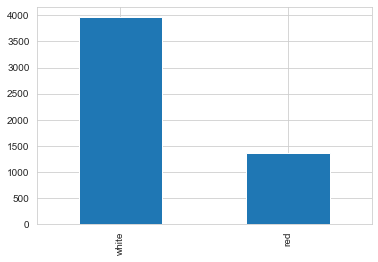

In [112]:
wine['type'].value_counts().plot.bar()
plt.show()

We can see that we have some quality for each wine. Let's take a look on it:

In [113]:
wine["quality"].value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

We can groupby the wine into type groups to see which one has a greater quality:

In [114]:
df_types = wine.groupby('type')
df_types

In [115]:
df_types.quality.mean()

type
red      5.623252
white    5.854835
Name: quality, dtype: float64

As we can see, the white wine that we have in the dataset, has a little bit better quality than the red wine.

In [116]:
#prepertion - dummies

wine['type'] = wine['type'].map({'red':0, 'white':1})
# 0 = red
# 1 = white
wine

<ipython-input-116-63711f0d59c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['type'] = wine['type'].map({'red':0, 'white':1})


For some histograms, we should make a dataframe which presents the type of the wine as a dummy feature. The reasons is because white wine is'nt better that red wine. We want present them as equal values.

In [117]:
dummy_wine = wine

dummy_wine['type'] = dummy_wine['type'].map({
    0:'red',
    1:'white'
})

types_for_dummy = pd.get_dummies(dummy_wine.type)
dummy_wine = dummy_wine.join(types_for_dummy)
dummy_wine = dummy_wine.drop(columns=['type'])
dummy_wine

<ipython-input-117-bc094c2b3c3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_wine['type'] = dummy_wine['type'].map({


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1


In [118]:
df_quality = dummy_wine.groupby('quality')
df_quality

In [119]:
red_sum = df_quality.red.sum()
red_sum = red_sum.to_frame().rename(columns={'quality':'red'}).reset_index()

red_sum

,quality,red
0,3,10.0
1,4,53.0
2,5,577.0
3,6,535.0
4,7,167.0
5,8,17.0
6,9,0.0


In [120]:
white_sum = df_quality.white.sum()
white_sum = white_sum.to_frame().rename(columns={'quality':'white'}).reset_index()
white_sum

,quality,white
0,3,20.0
1,4,153.0
2,5,1175.0
3,6,1788.0
4,7,689.0
5,8,131.0
6,9,5.0


In [121]:
qual_df = pd.merge(red_sum, white_sum, how = 'outer')
qual_df

,quality,red,white
0,3,10.0,20.0
1,4,53.0,153.0
2,5,577.0,1175.0
3,6,535.0,1788.0
4,7,167.0,689.0
5,8,17.0,131.0
6,9,0.0,5.0


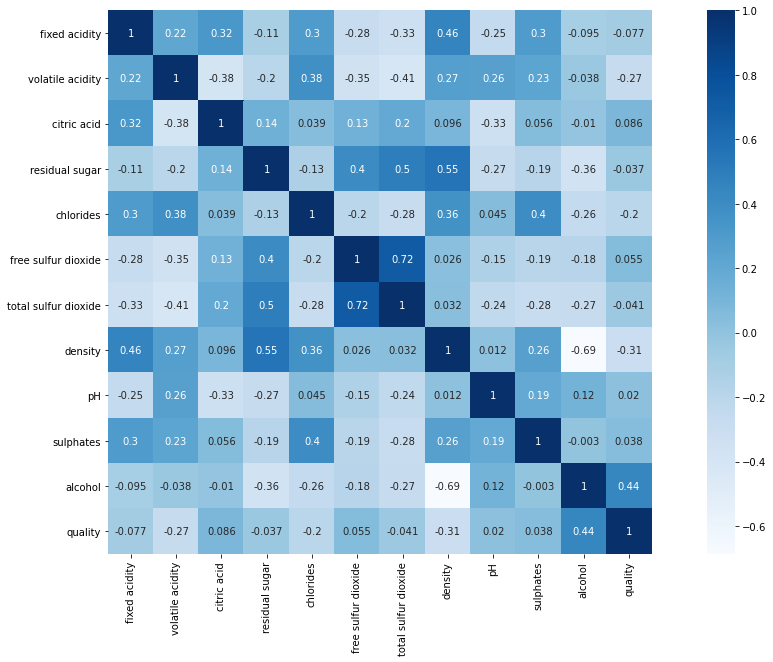

In [45]:
#i want to know the correalation between each featurre
plt.figure(figsize=(20, 10))
sns.heatmap(wine.corr(), square=True, annot=True, cmap="Blues")

Heatmap is a super important tool, because it tells us the bigger story.
As we can see, total sulfur dioxide has a huge effect on the type of the wine (0.7!).
Another intersting thing is the fact that the quality of the wine has a connection to the type of the wine. It will be intresting to find out which one of the types has the higher quality.

['red' 'white']


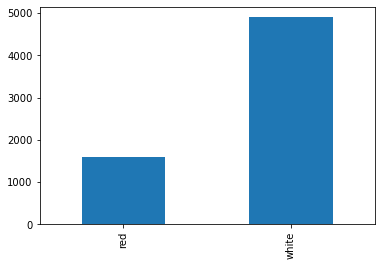

In [46]:
print(wine['type'].unique())

wine['type'].value_counts().sort_index().plot.bar()

In [66]:
wine.corr(method='spearman').sort_values(by=wine.type, ascending=False)

KeyError: 0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: type, Length: 6497, dtype: object

In [ ]:
# חושב שאולי כדאי להוריד את העמודה של האיכות בגלל שאיכות זה עניין של טעם בעיקר ולא של הרכב חומרים

In [67]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,1.007471e-15,1.002225e-15,-1.753083e-16,-1.693547e-15,2.865015e-16,1.009232e-15,-9.658103e-16,-4.487338e-15,3.086803e-15,3.102883e-16,-1.131481e-15,6.444958e-16
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00,-3.227687e+00
25%,-6.289329e-01,-6.661613e-01,-4.723335e-01,-7.657978e-01,-5.147986e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.748622e-01,-6.805919e-01,-8.316152e-01,-9.372296e-01
50%,-1.660892e-01,-3.016939e-01,-5.941375e-02,-5.135612e-01,-2.578826e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.287424e-02,-1.429373e-01,-1.608231e-01,2.079990e-01
75%,3.738951e-01,3.664962e-01,4.911459e-01,5.584445e-01,2.559494e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.313125e-01,4.619241e-01,6.776670e-01,2.079990e-01
max,6.699425e+00,7.534354e+00,9.231281e+00,1.268682e+01,1.584219e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.923029e+00,9.870879e+00,3.696231e+00,3.643685e+00


In [126]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
ss = StandardScaler()
df = wine
df[features] = ss.fit_transform(df[features])
df.head(3)

<ipython-input-126-af99e9ace4b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = ss.fit_transform(df[features])
C:\Haim\Anaconda\Python\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.140064,2.115349,-2.164515,-0.699699,0.523880,-1.069272,-1.411143,1.100996,1.779304,0.177941,-0.969152,-0.904497,red
1,0.443199,3.185297,-2.164515,-0.544135,1.120736,-0.282905,-0.829839,0.763753,-0.153797,0.979389,-0.631833,-0.904497,red
2,0.443199,2.471998,-1.892672,-0.610806,0.957957,-0.844596,-1.058837,0.831202,0.220351,0.779027,-0.631833,-0.904497,red


In [133]:
df['type']=df['type'].map({'red':0,'white':1})
df

<ipython-input-133-a0a031d07624>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type']=df['type'].map({'red':0,'white':1})


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.140064,2.115349,-2.164515,-0.699699,0.523880,-1.069272,-1.411143,1.100996,1.779304,0.177941,-0.969152,-0.904497,0
1,0.443199,3.185297,-2.164515,-0.544135,1.120736,-0.282905,-0.829839,0.763753,-0.153797,0.979389,-0.631833,-0.904497,0
2,0.443199,2.471998,-1.892672,-0.610806,0.957957,-0.844596,-1.058837,0.831202,0.220351,0.779027,-0.631833,-0.904497,0
3,3.019841,-0.381197,1.641293,-0.699699,0.496751,-0.732258,-0.953146,1.168444,-0.403229,0.311515,-0.631833,0.232268,0
5,0.140064,1.877583,-2.164515,-0.721923,0.496751,-0.956934,-1.305451,1.100996,1.779304,0.177941,-0.969152,-0.904497,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.769339,-0.797288,-0.193650,-0.766370,-0.479922,-0.339074,-0.389457,-1.145039,0.282710,-0.222784,0.548783,0.232268,1
6493,-0.466204,-0.143431,0.282076,0.655929,-0.262884,1.514508,0.949305,0.122993,-0.465588,-0.489933,-0.800493,-0.904497,1
6494,-0.541988,-0.618963,-0.873259,-0.855263,-0.425662,-0.002059,-0.054766,-0.672899,-1.463317,-0.489933,-0.969152,0.232268,1
6495,-1.299824,-0.321755,-0.125689,-0.877487,-0.941128,-0.563750,-0.072382,-1.971283,0.719216,-1.024232,1.898059,1.369032,1


Training - Testing split

In [134]:
target=df['type']
data=df.drop(['type'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=0)

# Dummy Classifier

#### (quick explanation) our model must be better than this model.

In [202]:
# our otions: 'most_frequent', 'stratified', 'uniform', 'constant', 'prior')
# I chose the best dummy classifier

dm = DummyClassifier(strategy='stratified')
dm.fit(X_train,y_train)
dm

DummyClassifier(strategy='stratified')

In [203]:
y_pred = dm.predict(X_test)

In [204]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.31      0.30       338
           1       0.76      0.74      0.75       992

    accuracy                           0.63      1330
   macro avg       0.52      0.53      0.53      1330
weighted avg       0.64      0.63      0.64      1330



Text(34.0, 0.5, 'Actual')

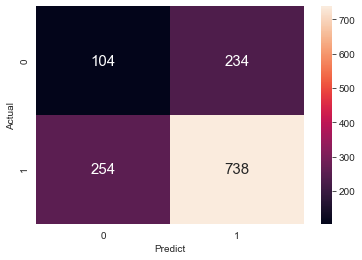

In [205]:
cm_dm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

## ROC Curve

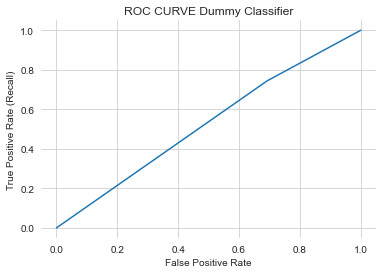

The score for the ROC Curve is: 52.6%


In [209]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE Dummy Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

dummy_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

The most frequent strategy goes always after the majority. In our case, that every wine is white, because 73% of the wine is white.

# KNN - K-Nearest Neighbors

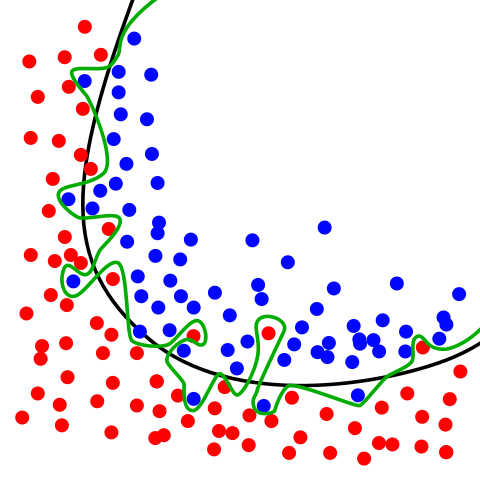

#### (quick explanation)

In [210]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn

KNeighborsClassifier()

In [211]:
y_pred = knn.predict(X_test)

In [212]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       338
           1       0.99      0.99      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.99      0.99      1330
weighted avg       0.99      0.99      0.99      1330



In [213]:
k_range = list(range(3,51))
weghit_op = ['uniform','distance']
d = {'n_neighbors' :k_range,'weights': weghit_op}

### Cross validation:

In [214]:
grid_temp = GridSearchCV(knn,d,cv=10,scoring='accuracy')
grid_temp.fit(data,target)
print("score:",grid_temp.best_score_," params:",grid_temp.best_params_)

score: 0.9930451127819551  params: {'n_neighbors': 6, 'weights': 'distance'}


In [215]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [216]:
y_pred = knn.predict(X_test)

In [217]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       338
           1       0.99      0.99      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.99      0.99      1330
weighted avg       0.99      0.99      0.99      1330



Text(34.0, 0.5, 'Actual')

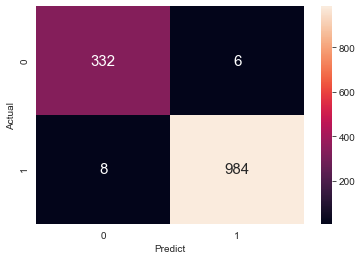

In [218]:
cm_knn = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_knn,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

## ROC Curve

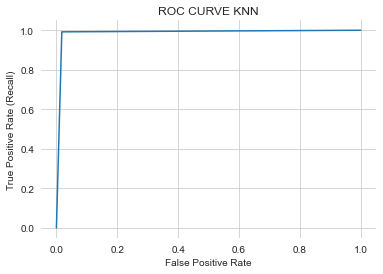

The score for the ROC Curve is: 98.7%


In [219]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

knn_auc = round(auc,3)*100

print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# Desicion Tree

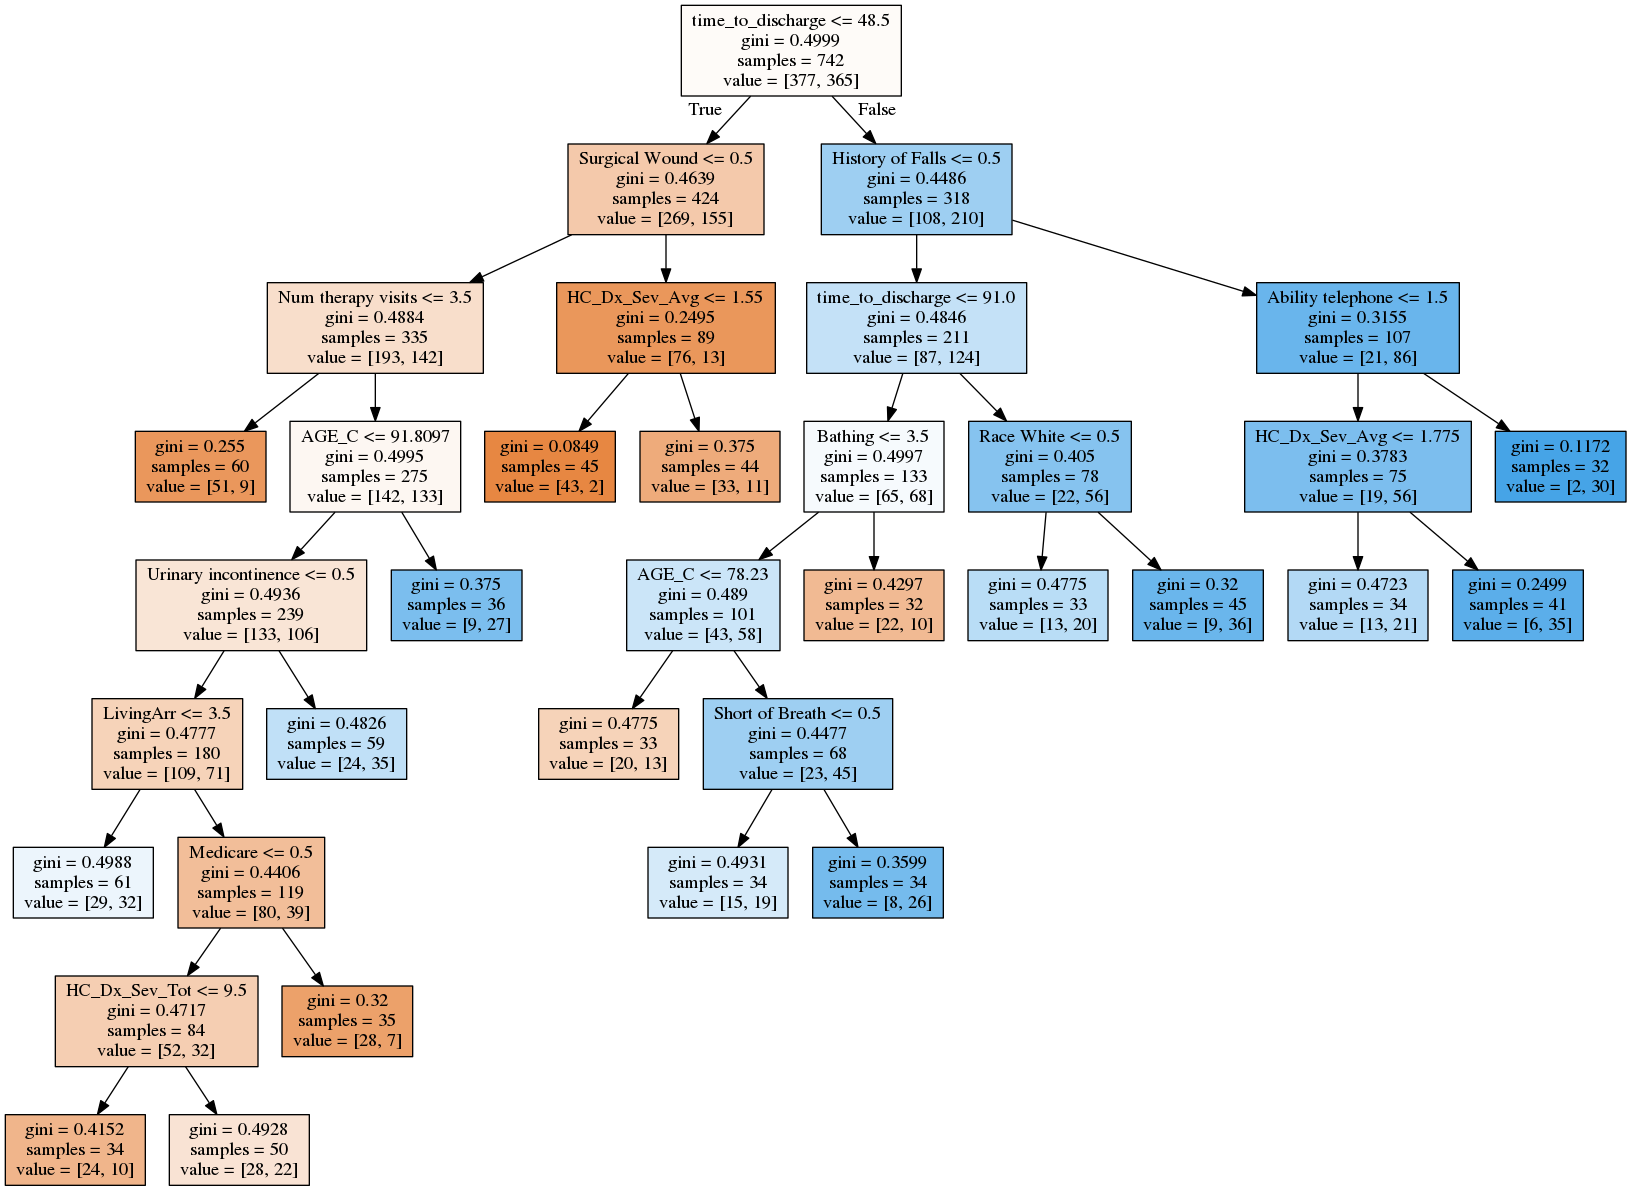

(quick explanation)

In [220]:
dct = DecisionTreeClassifier()
dct = dct.fit(X_train,y_train)
dct

DecisionTreeClassifier()

In [221]:
y_pred = dct.predict(X_test)

In [222]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       338
           1       0.99      0.98      0.99       992

    accuracy                           0.98      1330
   macro avg       0.97      0.97      0.97      1330
weighted avg       0.98      0.98      0.98      1330



In [223]:
path = dct.cost_complexity_pruning_path(X_train,y_train)
alphas = path.ccp_alphas

In [224]:
d = {'ccp_alpha':alphas}

### Cross validation:

In [225]:
grid_dct = GridSearchCV(dct,d, cv=10,scoring='accuracy')
grid_dct.fit(data,target)
print("score:",grid_dct.best_score_," params:",grid_dct.best_params_)

score: 0.980263157894737  params: {'ccp_alpha': 0.0004761904761904761}


In [226]:
dct = DecisionTreeClassifier(ccp_alpha = 0.0004761904761904761)
dct = dct.fit(X_train,y_train)
dct

DecisionTreeClassifier(ccp_alpha=0.0004761904761904761)

In [227]:
y_pred = dct.predict(X_test)

In [228]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       338
           1       0.99      0.98      0.99       992

    accuracy                           0.98      1330
   macro avg       0.97      0.97      0.97      1330
weighted avg       0.98      0.98      0.98      1330



Text(34.0, 0.5, 'Actual')

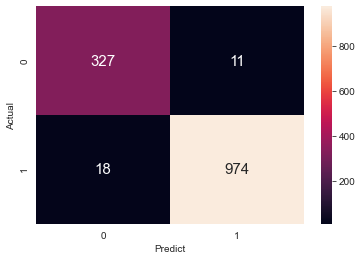

In [229]:
cm_dct = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dct,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

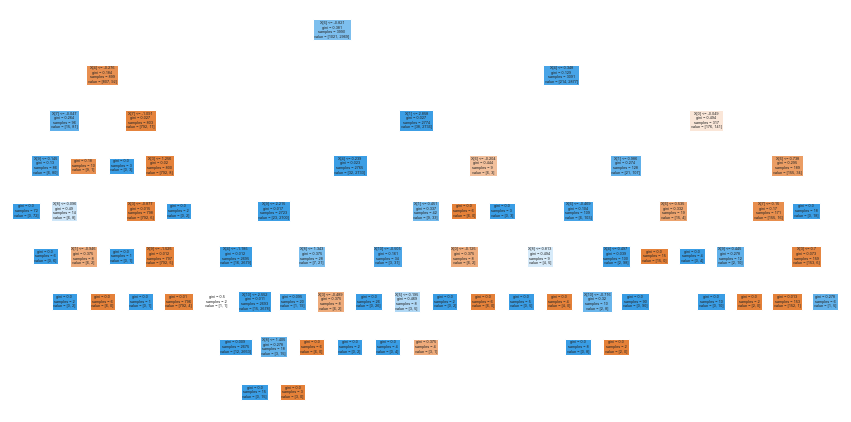

In [230]:
plt.figure(figsize=(15,7.5))
plot_tree(dct,filled=True);

## ROC Curve

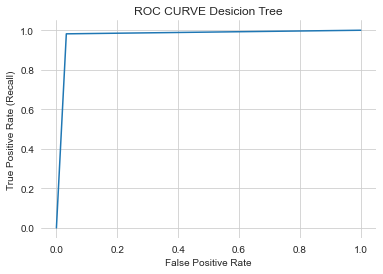

The score for the ROC Curve is: 97.5%


In [231]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE Desicion Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

dct_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# Logistic Regression

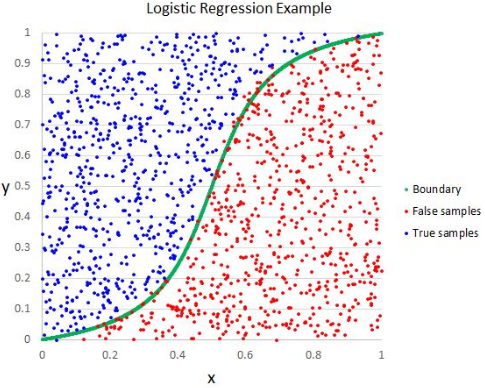

(quick explanation)

In [233]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
# we use this train model so we can get the prediction for our test dataset (X_test)
predictions = lr.predict(X_test)

In [234]:
#evolution process : classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       338
           1       0.99      1.00      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.98      0.99      1330
weighted avg       0.99      0.99      0.99      1330



Text(34.0, 0.5, 'Actual')

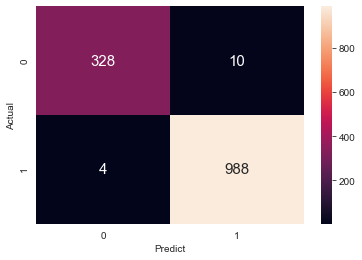

In [235]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

In [236]:
print(metrics.accuracy_score(y_test, predictions))

0.9894736842105263


## ROC Curve

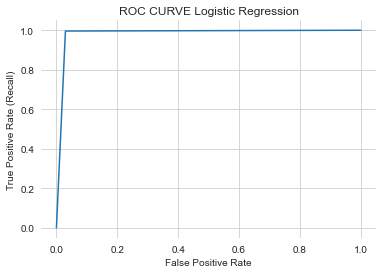

The score for the ROC Curve is: 98.3%


In [239]:
fpr, tpr, _= roc_curve(y_test, predictions)
auc= roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

lr_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# Conclusion

In [246]:
print("The score for the models:\n")
print("Dummy Classifer:      ",dummy_auc,"%")
print("KNN:                  ",knn_auc,"%")
print("Decision Tree:        ",dct_auc,"%")
print("Logistic Regression:  ",lr_auc,"%")

The score for the models:

Dummy Classifer:       52.6 %
KNN:                   98.7 %
Decision Tree:         97.5 %
Logistic Regression:   98.3 %


## It can be concluded that KNN is the most accurate model for our dataset, with 98.7 percentages of success.